In [1]:
import pandas as pd
import requests
import numpy as np
import cn2an
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
output_file_name = "data-10-year" 
url = "https://lvr.land.moi.gov.tw/SERVICE/QueryPrice/4e0576046a76e14518f1ccfbc618b2ed?q=VTJGc2RHVmtYMThOVGx6b3JmUTRtaUVMa3I2VWR2S1F1LzNON1Z3a0VFeWpLUFVtQlFETUR3Nm9nalNnMnVkRzUwYVh5ZkRRQUZDZzBsc2t5UktjbWd3UUxhcU5WbUw5UFpvV25ZalYwVGJPeUFuN3dCWm9tR1M4MXdla0lRbXFxWXNiSEJOSXZWRGdCVzgxTWhESFdxZHVZYkVRNmUrSmxHYU4rZkYxR0JkenBXRzAybWJYWEIyMkw2aVRlL3BrTW8zU0k1R3lIeWQrczA0UmpGYUxRYjNPT0ZFSGVzUysrWUthRWdKOGNqbzZTYUpCSU9Kd1hJMEd4UEFOOCs3MmwvRmRHalNyckFUOEVKVjljT1U2cTgxakFncnYzUFIvbDFncjFRcHVkZllyUENmOFA2c1RuU2FTbEFmbE5Dcy9FRzlSNWUxMDJ6OG1JZ09DNTZMZlVzeE5pQ3BCYTFTTFN5c1VReStRUlR4bm5yZFhFL25YeWluRmYxWXVkWm1uTlQ2cnlsdUcza3lRMk44SjcxYzFsZ3N4Qlc0ZDZNUXZlZCs1cEtYdzh5c09JNnNKMHRTdGJ0QVR5SUZVR1BReWhZeDhXdmg2VXJXRjdNODBUOGpUODcwdFdEZk5zME5OSFMzajRCanIwMHNmcy9iKy9hTGFCNVIvUmx3aGxjOGYxeVBSOTJ1WDdSTTBFanZZbGlvN3l6cXRaUDc5K1NEcFdQbUJrdW12QzVVZ01UNW9JVHlCWnFLcmgvMTNXU1lRWnFodUw4OGJFb0JsNzlaVzN4Yk9SWmE5UFlNcXhMM3lmOWEvWTV1WHFiTDlKK2RYZ0RuNE1vZkRKbFpDZTlLeVorNFBSZml0dFhpSTZXN3Nic0E0eHZPV1V5WmJGcW0wRUw2eTdZUzluSjJRTHg1NXVSVENDaW1FQnB2Rk1MMHIzSks5Wk1vVTN6clpSLzlGTDhiTkYzbzJ3SzVSajM3QWVMVU1tRGVlWFBNPQ=="

Extract certain features

In [3]:
columns = ["lon", "lat", "g", "s", "b", "pu", "f", "v", "el", "m", "l", "e", "tp"]
new_columns = {
    "lon": "longitude",
    "lat": "latitude",
    "g": "house_age",
    "s": "area",
    "b": "property_type",
    "pu": "purpose",
    "f": "floor",
    "v": "layout",
    "el": "elevator",
    "m": "janitor",
    "l": "parking_space",
    "e": "closing_year",
    "tp": "price",
}

print("Start")

res = requests.get(url)
data = res.json()

df = pd.DataFrame(data)
df.to_csv(f'./Raw-Data/{output_file_name}-raw.csv', index=False, encoding="utf_8_sig")

print("Finish")

Start
Finish


In [4]:
df = pd.read_csv(f'./Raw-Data/{output_file_name}-raw.csv')

In [5]:
df = df[columns]
df = df.replace('', np.nan)
df = df.rename(columns=new_columns)
df[:5]

,longitude,latitude,house_age,area,property_type,purpose,floor,layout,elevator,janitor,parking_space,closing_year,price
0,121.037349,24.801444,12.0,55.35,住宅大樓(11層含以上有電梯),住家用,二十四層/二十四層,3房2廳2衛,有,有,2,112/11/01,"24,240,000"
1,121.033027,24.803793,15.0,15.41,華廈(10層含以下有電梯),商業用,八層/九層,2房2廳1衛,有,有,0,112/11/10,"10,000,000"
2,121.041969,24.806653,NaN,29.87,住宅大樓(11層含以上有電梯),住家用,四層/十四層,1房1廳1衛,有,有,1,112/11/03,"16,680,000"
3,121.057406,24.798549,15.0,8.10,公寓(5樓含以下無電梯),住家用,二層/四層,1房1衛,無,無,0,112/11/13,"2,200,000"
4,121.008182,24.836660,42.0,43.97,透天厝,住家用,全/三層,3房2廳3衛,無,無,0,112/11/10,"15,500,000"


Handle the missing values

In [6]:
# print out the column which contains missing values 
missing_columns = []
for column_name in df.columns:
    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')
    if missing_count > 0:
        missing_columns.append(column_name)

longitude: 0
latitude: 0
house_age: 17029
area: 0
property_type: 1
purpose: 1
floor: 2
layout: 1689
elevator: 27881
janitor: 0
parking_space: 0
closing_year: 0
price: 0


In [7]:
for column_name in missing_columns:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

    missing_count = df[column_name].isna().sum()
    print(f'{column_name}: {missing_count}')

house_age: 0
property_type: 0
purpose: 0
floor: 0
layout: 0
elevator: 0


Remove ',' in `area`

In [8]:
df['area'] = df['area'].str.replace(',', '').astype(float)

Layout processing

In [9]:
df[['bedroom', 'living_room', 'bathroom']] = df['layout'].str.extract('(\d+)房(\d+)廳(\d+)衛')
df[['bedroom', 'living_room', 'bathroom']] = df[['bedroom', 'living_room', 'bathroom']].fillna(0).astype(int)
df = df.drop(columns=['layout'])

In [10]:
df[['bedroom', 'living_room', 'bathroom']]

,bedroom,living_room,bathroom
0,3,2,2
1,2,2,1
2,1,1,1
3,0,0,0
4,3,2,3
...,...,...,...
43880,3,2,2
43881,3,2,2
43882,3,2,2
43883,3,2,2


`Elevator`, `Janitor` and `purpose` processing (Label Encoding)

In [11]:
binary_mapping = {"有": 1, "無": 0}
df["elevator"] = df["elevator"].map(binary_mapping)
df["janitor"] = df["janitor"].map(binary_mapping)

df["residential"] = df["purpose"].map(lambda val : 1 if val == '住家用' else 0)
df = df.drop(columns=['purpose'])

In [12]:
df[['elevator', 'janitor', 'residential']]

,elevator,janitor,residential
0,1,1,1
1,1,1,0
2,1,1,1
3,0,0,1
4,0,0,1
...,...,...,...
43880,1,1,1
43881,1,1,1
43882,1,1,1
43883,1,1,1


`Property Type` processing (One Hot Encoding)

In [13]:
property_type_mapping = {
    '住宅大樓(11層含以上有電梯)': 'residential_building',
    '公寓(5樓含以下無電梯)': 'apartment',
    '華廈(10層含以下有電梯)': 'mansion',
    '透天厝': 'detached_house'
}

df['property_type'] = df['property_type'].map(property_type_mapping)
df = pd.get_dummies(df, columns=['property_type'])

In [14]:
df[['property_type_residential_building', 'property_type_apartment', 'property_type_mansion', 'property_type_detached_house']]

,property_type_residential_building,property_type_apartment,property_type_mansion,property_type_detached_house
0,1,0,0,0
1,0,0,1,0
2,1,0,0,0
3,0,1,0,0
4,0,0,0,1
...,...,...,...,...
43880,1,0,0,0
43881,1,0,0,0
43882,1,0,0,0
43883,0,0,1,0


`Floor` processing 

In [15]:
# Split floor to sale_floor and total_floor
df[['sale_floor', 'total_floor']] = df['floor'].str.split('/', expand=True)
df = df.drop(['floor'], axis=1)

In [16]:
# Convert Chinese to Arabic number in total_floor column
df['total_floor'] = df['total_floor'].replace('層','', regex=True)
df = df.drop(df[df['total_floor'] == '--'].index)    # Remove the row if the total_floor value is '--'
df['total_floor'] = df['total_floor'].apply(lambda x: cn2an.cn2an(x))


In [17]:
# After splitting floor, total_floor or sale_floor might be empty  
df = df.replace('', np.nan)
for column_name in ['total_floor', 'sale_floor']:
    mode_value = df[column_name].mode()[0]
    df[column_name].fillna(mode_value, inplace=True)

In [18]:
# Split sale_floor into sale_floor, sale_floor_basement, sale_floor_all, sale_floor_other 
def sale_floor_mapping(value):
    keywords = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
    if any(keyword in value for keyword in keywords):
        return 'other'
    elif '地下' in value:
        return 'basement'
    elif '全' in value:
        return 'all'
    
    else:
        # Convert Chinese to Arabic number in sale_floor column
        value = value.replace('層', '')
        return value

# for sale_floor_count
def sale_floor_cnt(series):
    if '全' in series['sale_floor']:
        return series['total_floor']
    else:
        return series['sale_floor'].count('層') - series['sale_floor'].count('夾層')
    
    
### 以下求優化

others = ['騎樓', '見其他登記事項', '夾層', '屋頂突出物', '儲藏室', '避難室兼停車場', '防空避難室']
lowerFloor = ['一層', '二層', '三層', '四層', '五層']
middleFloor = ['六層', '七層', '八層', '九層', '十層', '十一層', '十二層', '十三層', '十四層', '十五層']
higherFloor_n = others + lowerFloor + middleFloor + ['全', '地下']

df['sale_floor_all'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['sale_floor_basement'] = df['sale_floor'].map(lambda x: 1 if '地下' in x else 0)
df['sale_floor_other'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x for keyword in others) else 0)

df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in lowerFloor) else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if any(keyword in x.split(',') for keyword in middleFloor) else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if any(floor for floor in x.split(',') if floor not in higherFloor_n) else 0)

# if '全' set lower_floor, middle_floor, and higher_floor to 1
df['lower_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['middle_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)
df['higher_floor'] = df['sale_floor'].map(lambda x: 1 if '全' in x else 0)

# count the number of floor being sold 
df['sale_floor_count'] = df.apply(sale_floor_cnt, axis=1)

# drop sale_floor column
df = df.drop(['sale_floor'], axis=1)

In [19]:
df[['sale_floor_all', 'sale_floor_basement', 'sale_floor_other', 'lower_floor', 'middle_floor', 'higher_floor', 'sale_floor_count','total_floor']]

,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor
0,0,0,0,0,0,0,1,24
1,0,0,0,0,0,0,1,9
2,0,0,0,0,0,0,1,14
3,0,0,0,0,0,0,1,4
4,1,0,0,1,1,1,3,3
...,...,...,...,...,...,...,...,...
43880,0,0,0,0,0,0,1,14
43881,0,0,0,0,0,0,1,14
43882,0,0,0,0,0,0,1,14
43883,0,0,0,0,0,0,1,7


`Closing year` processing

In [20]:
df['date'] = df['closing_year']
df['closing_year'] = df['closing_year'].str.split('/', expand=True)[0]

In [21]:
df['closing_year']

0        112
1        112
2        112
3        112
4        112
        ... 
43880    103
43881    103
43882    103
43883    103
43884    103
Name: closing_year, Length: 43885, dtype: object

Move `sale_floor` and `total_floor` backward

In [22]:
# df = pd.concat([df.drop('sale_floor', axis=1), df['sale_floor']], axis=1)
df = pd.concat([df.drop('total_floor', axis=1), df['total_floor']], axis=1)

`Price` processing 

In [23]:
# Price string to int
df['price'] = df['price'].replace(',','', regex=True).map(int)
# move price back
df = pd.concat([df.drop('price', axis=1), df['price']], axis=1)
# drop (不知道哪個 RZ 在上面登記 0 元的房子)
df.drop(df[(df['price'] == 0)].index, inplace=True)

In [24]:
df['price']

0        24240000
1        10000000
2        16680000
3         2200000
4        15500000
           ...   
43880     6050000
43881     6800000
43882    11700000
43883     4600000
43884     5780000
Name: price, Length: 43885, dtype: int64

Output the file

In [25]:
rec_df = df
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,date,total_floor,price
0,121.037349,24.801444,12.0,55.35,1,1,2,112,3,2,...,0,0,0,0,0,0,1,112/11/01,24,24240000
1,121.033027,24.803793,15.0,15.41,1,1,0,112,2,2,...,0,0,0,0,0,0,1,112/11/10,9,10000000
2,121.041969,24.806653,1.0,29.87,1,1,1,112,1,1,...,0,0,0,0,0,0,1,112/11/03,14,16680000
3,121.057406,24.798549,15.0,8.10,0,0,0,112,0,0,...,0,0,0,0,0,0,1,112/11/13,4,2200000
4,121.008182,24.836660,42.0,43.97,0,0,0,112,3,2,...,1,0,0,1,1,1,3,112/11/10,3,15500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43880,121.025346,24.825481,9.0,34.05,1,1,0,103,3,2,...,0,0,0,0,0,0,1,103/01/07,14,6050000
43881,121.024543,24.820497,10.0,39.96,1,1,1,103,3,2,...,0,0,0,0,0,0,1,103/01/26,14,6800000
43882,121.022988,24.808580,7.0,28.83,1,1,1,103,3,2,...,0,0,0,0,0,0,1,103/01/21,14,11700000
43883,121.015543,24.832732,21.0,36.54,1,1,0,103,3,2,...,0,0,0,0,0,0,1,103/01/23,7,4600000


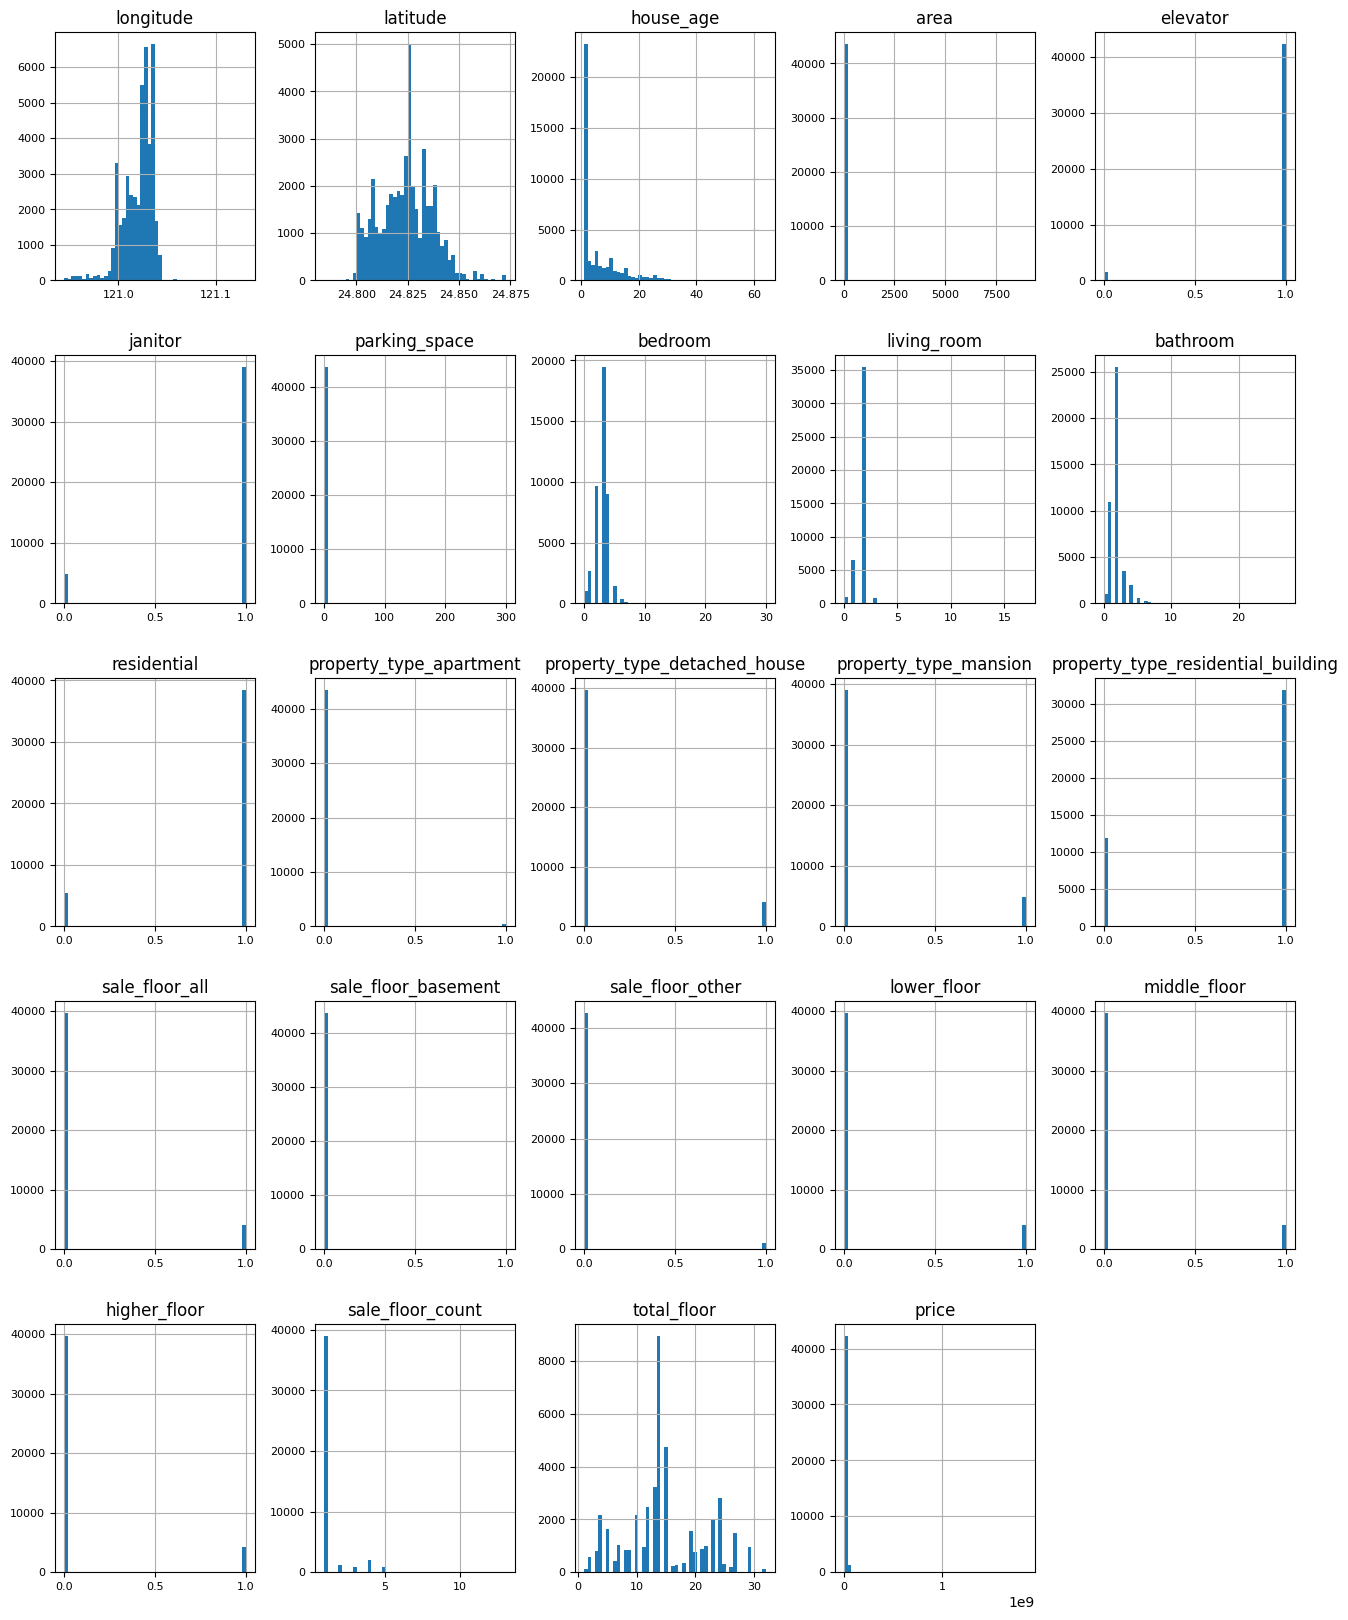

In [26]:
df = rec_df.copy()
df.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8);

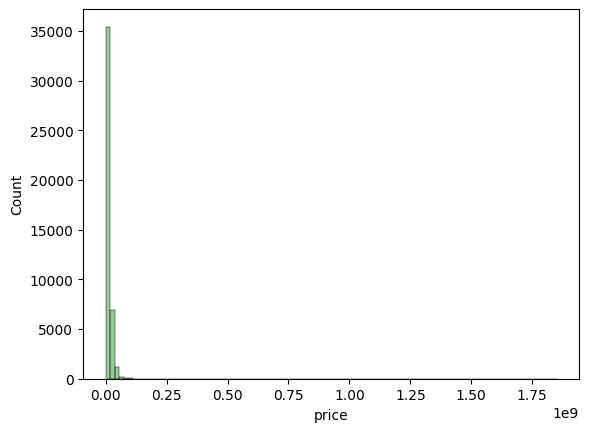

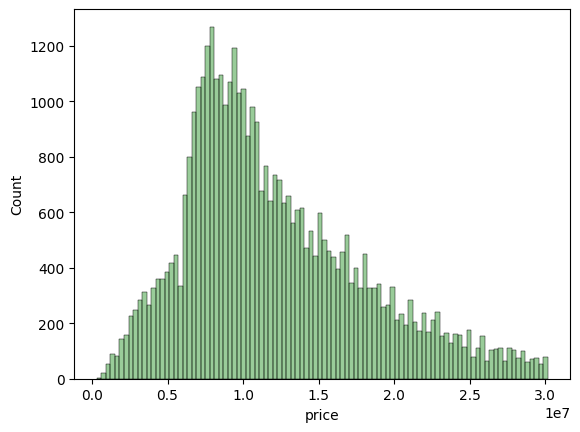

In [27]:


sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

# 去掉 price 離群值
s = df['price'].describe()
IQR = s['75%'] - s['25%']
upper_bound = s['75%'] + IQR*1.5
lower_bound = s['25%'] - IQR*1.5
df = df[df['price'] < upper_bound]
df = df[df['price'] > lower_bound]

sns.histplot(df['price'], color='g', bins=100, alpha=0.4)
plt.show()

In [28]:
df['closing_year'] = df['closing_year'].astype(int)
for i in range(1, 11):
    filter_df = df[(df['closing_year'] > (112 - i))]
    filter_df.to_csv(f'./Basic-Preprocessed-Data/data-{i}-year.csv', index=False, encoding="utf_8_sig")

In [29]:
stock_df = pd.read_csv(f'../^TWII.csv')
df = pd.read_csv(f'./Basic-Preprocessed-Data/data-10-year.csv')

def convert_roc_to_ad(date_str):
    parts = date_str.split('/')
    if len(parts) == 3:
        year = int(parts[0]) + 1911
        return f"{year}/{parts[1]}/{parts[2]}"
    else:
        return None

df['date'] = df['date'].apply(convert_roc_to_ad) 

df['date'] = pd.to_datetime(df['date'])
stock_df['Date'] = pd.to_datetime(stock_df['Date'])

df['YM'] = df['date'].dt.to_period('M')
stock_df['YM'] = stock_df['Date'].dt.to_period('M')

stock_df = stock_df[['YM', 'Close']]

df = pd.merge(df, stock_df, on='YM', how='left')

df = df.drop(columns=['date', 'YM'])
df = df.rename(columns={'Close': 'stock'})
price_column = df.pop('price')
df['price'] = price_column
df

,longitude,latitude,house_age,area,elevator,janitor,parking_space,closing_year,bedroom,living_room,...,sale_floor_all,sale_floor_basement,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,stock,price
0,121.037349,24.801444,12.0,55.35,1,1,2,112,3,2,...,0,0,0,0,0,0,1,24,17433.849609,24240000
1,121.033027,24.803793,15.0,15.41,1,1,0,112,2,2,...,0,0,0,0,0,0,1,9,17433.849609,10000000
2,121.041969,24.806653,1.0,29.87,1,1,1,112,1,1,...,0,0,0,0,0,0,1,14,17433.849609,16680000
3,121.057406,24.798549,15.0,8.10,0,0,0,112,0,0,...,0,0,0,0,0,0,1,4,17433.849609,2200000
4,121.008182,24.836660,42.0,43.97,0,0,0,112,3,2,...,1,0,0,1,1,1,3,3,17433.849609,15500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41335,121.025346,24.825481,9.0,34.05,1,1,0,103,3,2,...,0,0,0,0,0,0,1,14,8462.570313,6050000
41336,121.024543,24.820497,10.0,39.96,1,1,1,103,3,2,...,0,0,0,0,0,0,1,14,8462.570313,6800000
41337,121.022988,24.808580,7.0,28.83,1,1,1,103,3,2,...,0,0,0,0,0,0,1,14,8462.570313,11700000
41338,121.015543,24.832732,21.0,36.54,1,1,0,103,3,2,...,0,0,0,0,0,0,1,7,8462.570313,4600000


In [30]:
columns_to_normalize = ['stock', 'longitude', 'latitude', 'house_age','area', 'parking_space', 'bedroom', 'living_room', 'bathroom', 'sale_floor_count', 'total_floor']

# 使用MinMaxScaler進行MinMax 歸一化
min_max_scaler = MinMaxScaler()
df[columns_to_normalize] = min_max_scaler.fit_transform(df[columns_to_normalize])
df[columns_to_normalize]

,stock,longitude,latitude,house_age,area,parking_space,bedroom,living_room,bathroom,sale_floor_count,total_floor
0,0.922571,0.500134,0.194974,0.174603,0.015156,0.2,0.100000,0.117647,0.095238,0.000000,0.741935
1,0.922571,0.476879,0.221484,0.222222,0.003372,0.0,0.066667,0.117647,0.047619,0.000000,0.258065
2,0.922571,0.524997,0.253766,0.000000,0.007638,0.1,0.033333,0.058824,0.047619,0.000000,0.419355
3,0.922571,0.608059,0.162289,0.222222,0.001216,0.0,0.000000,0.000000,0.000000,0.000000,0.096774
4,0.922571,0.343197,0.592498,0.650794,0.011799,0.0,0.100000,0.117647,0.142857,0.166667,0.064516
...,...,...,...,...,...,...,...,...,...,...,...
41335,0.037676,0.435549,0.466304,0.126984,0.008872,0.0,0.100000,0.117647,0.095238,0.000000,0.419355
41336,0.037676,0.431232,0.410048,0.142857,0.010615,0.1,0.100000,0.117647,0.095238,0.000000,0.419355
41337,0.037676,0.422864,0.275521,0.095238,0.007332,0.1,0.100000,0.117647,0.095238,0.000000,0.419355
41338,0.037676,0.382802,0.548158,0.317460,0.009606,0.0,0.100000,0.117647,0.095238,0.000000,0.193548


## Heatmap

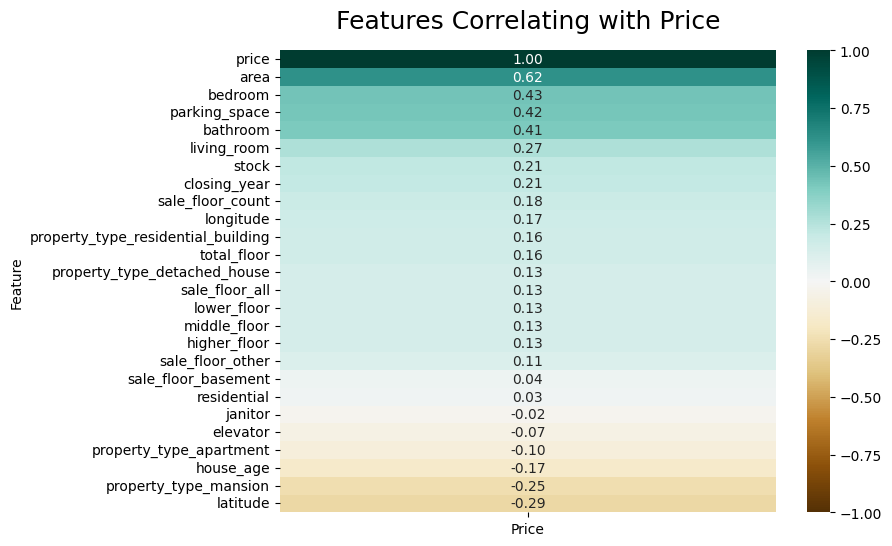

In [31]:
price_corr = df.corrwith(df['price'])
price_corr_df = pd.DataFrame({'Feature': price_corr.index, 'Correlation': price_corr.values})

sorted_corr_matrix = price_corr_df.sort_values(by='Correlation', ascending=False)
sorted_features = sorted_corr_matrix['Feature'].values

sorted_corr_values = df[sorted_features].corrwith(df['price'])
sorted_corr_df = pd.DataFrame({'Feature': sorted_features, 'Correlation': sorted_corr_values})

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=sorted_corr_df.set_index('Feature'), annot=True, cmap='BrBG', fmt=".2f", vmax=1, vmin=-1)
heatmap .set_xticks([0.5])
heatmap.set_xticklabels(['Price'], rotation=0, fontsize=10)
heatmap.set_title('Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
plt.show()

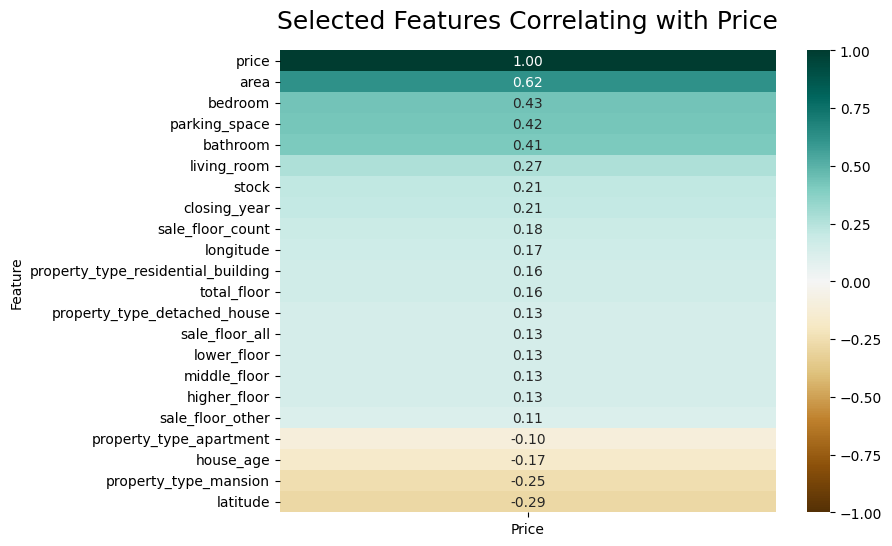

In [32]:
mask = (sorted_corr_df['Correlation'] <= -0.1) | (sorted_corr_df['Correlation'] >= 0.1)
masked_corr_df = sorted_corr_df[mask]

plt.figure(figsize=(8, 6))
heatmap = sns.heatmap(data=masked_corr_df.set_index('Feature'), annot=True, cmap='BrBG', fmt=".2f", vmax=1, vmin=-1)
heatmap .set_xticks([0.5])
heatmap.set_xticklabels(['Price'], rotation=0, fontsize=10)
heatmap.set_title('Selected Features Correlating with Price', fontdict={'fontsize':18}, pad=16);
plt.show()

In [33]:
low_corr_features = sorted_corr_df[abs(sorted_corr_df['Correlation']) < 0.1]['Feature'].values
df_filtered = df.drop(low_corr_features, axis=1)
df_filtered

,longitude,latitude,house_age,area,parking_space,closing_year,bedroom,living_room,bathroom,property_type_apartment,...,property_type_residential_building,sale_floor_all,sale_floor_other,lower_floor,middle_floor,higher_floor,sale_floor_count,total_floor,stock,price
0,0.500134,0.194974,0.174603,0.015156,0.2,112,0.100000,0.117647,0.095238,0,...,1,0,0,0,0,0,0.000000,0.741935,0.922571,24240000
1,0.476879,0.221484,0.222222,0.003372,0.0,112,0.066667,0.117647,0.047619,0,...,0,0,0,0,0,0,0.000000,0.258065,0.922571,10000000
2,0.524997,0.253766,0.000000,0.007638,0.1,112,0.033333,0.058824,0.047619,0,...,1,0,0,0,0,0,0.000000,0.419355,0.922571,16680000
3,0.608059,0.162289,0.222222,0.001216,0.0,112,0.000000,0.000000,0.000000,1,...,0,0,0,0,0,0,0.000000,0.096774,0.922571,2200000
4,0.343197,0.592498,0.650794,0.011799,0.0,112,0.100000,0.117647,0.142857,0,...,0,1,0,1,1,1,0.166667,0.064516,0.922571,15500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41335,0.435549,0.466304,0.126984,0.008872,0.0,103,0.100000,0.117647,0.095238,0,...,1,0,0,0,0,0,0.000000,0.419355,0.037676,6050000
41336,0.431232,0.410048,0.142857,0.010615,0.1,103,0.100000,0.117647,0.095238,0,...,1,0,0,0,0,0,0.000000,0.419355,0.037676,6800000
41337,0.422864,0.275521,0.095238,0.007332,0.1,103,0.100000,0.117647,0.095238,0,...,1,0,0,0,0,0,0.000000,0.419355,0.037676,11700000
41338,0.382802,0.548158,0.317460,0.009606,0.0,103,0.100000,0.117647,0.095238,0,...,0,0,0,0,0,0,0.000000,0.193548,0.037676,4600000


In [34]:
# output normalized data
for i in range(1, 11):
    filtered_year_df = df[(df['closing_year'] > (112 - i))]
    filtered_year_df.to_csv(f'./Normalized-Data/data-{i}-year-normalized.csv', index=False, encoding="utf_8_sig")

In [35]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')
X = df.drop('price', axis=1)
y = df['price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

train_data = pd.concat([X_train, y_train], axis=1)
test_data = pd.concat([X_test, y_test], axis=1)

train_data.to_csv(f'./Train-10/Training-data-{10}-year.csv', index=False, encoding="utf_8_sig")
test_data.to_csv(f'./Train-10/Testing-data-{10}-year.csv', index=False, encoding="utf_8_sig")

In [36]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')
train_data = df[(df['closing_year'] <= 109) & (df['closing_year'] >= 103)]
train_data = train_data.drop(columns=['stock'])
train_data.to_csv(f'./Train-7-Predict-3/no-stock/Training-data-103-109.csv', index=False, encoding="utf_8_sig")
test_data = df[(df['closing_year'] <= 112) & (df['closing_year'] >= 110)]
test_data = test_data.drop(columns=['stock'])
test_data.to_csv(f'./Train-7-Predict-3/no-stock/Testing-data-110-112.csv', index=False, encoding="utf_8_sig")

In [37]:
df = pd.read_csv(f'./Normalized-Data/data-{10}-year-normalized.csv')

train_data = df[(df['closing_year'] <= 109) & (df['closing_year'] >= 103)]
train_data.to_csv(f'./Train-7-Predict-3/stock/Training-data-103-109.csv', index=False, encoding="utf_8_sig")
test_data = df[(df['closing_year'] <= 112) & (df['closing_year'] >= 110)];
test_data.to_csv(f'./Train-7-Predict-3/stock/Testing-data-110-112.csv', index=False, encoding="utf_8_sig")
